# Impact distribution

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Jiwoo Choi (jiwoochoi@inha.edu) </div>_

<br>

---

<br>

<br>

In this problem, the objective is to simulate the trajectory of a free-flying rocket and estimate the dispersion of the impact point due to wind effects.

<br>

Let us consider the equations of motion for a free-flying rocket.

The dynamics of the state variables, which include the velocity (speed), $V$, the flight path angle in the vertical plane, $\gamma$, and the heading angle in the horizontal plane, $\psi$, are given as follows.

The vertical flight path angle, $\gamma$ is defined as 0 degrees when the rocket is flying horizontally, increasing as the rocket ascends, with a value of 90 degrees representing vertical ascent. The horizontal heading angle is defined as 0 degrees when flying to north, increasing as the rocket turns right, reaching 90 degrees when flying to east.

<br>

\begin{align*}
  m\dot{V} &= D_x - mg\sin\gamma \\
  mV\dot{\gamma} &= -D_z -mg\cos\gamma \\
  mV\dot{\psi} &= D_y \\
\end{align*}

<center>
<img src="https://jonghank.github.io/ase3001/files/frame.png" width="600">
</center>

<br>

Here, $m$ represents the mass of the rocket, and the drag force $D = (D_x, D_y, D_z) \in \mathbb{R}^3$ consists of three components: 1) $D_x$, the drag component along the direction of the velocity vector, 2) $D_y$, the horizontal drag component perpendicular to the velocity vector and to the right, and 3) $D_z$, the vertical drag component perpendicular to the velocity vector and acting downward.
In general, a free-flying rocket is assumed to be statically stable, meaning the angle of attack remains 0 degrees at all times, allowing us to assume that no lift is generated.

The position of the rocket, relative to the launch point, is expressed as $p = (p_n, p_e, h) \in \mathbb{R}^3$, where $p_n$ represents the position in the northward ($N$) direction, $p_e$ represents the displacement in the eastward ($E$) direction, and $h$ represents the altitude ($H$). Note that the altitude ($H$) is in the opposite direction of the downward ($D$) direction, where gravity acts.

The rate of the position variables $p_n$, $p_e$, and $h$ is described by the following dynamics, where the right-hand sides can be interpreted as the $NEH$ components of the velocity vector, $v_n$ (northward velocity), $v_e$ (eastward velocity), and $\dot{h} = -v_d$(velocity in the altitude direction), expressed in terms of the state variables $V$, $\gamma$, and $\psi$.

<br>

\begin{align*}
  \dot{p}_n &= v_n = V\cos\gamma\cos\psi \\
  \dot{p}_e &= v_e = V\cos\gamma\sin\psi \\
  \dot{h} &= - v_d = V\sin\gamma
\end{align*}

<br>

The dynamics of the rocket’s trajectory can be expressed using the six state variables described above. With these six variables, the full equations of motion can be formulated. Once the drag components $D = (D_x, D_y, D_z)$, acting in the direction of motion and perpendicular directions, are provided at each moment, the time derivatives of the six state variables can be computed. These time derivatives can then be integrated over time to simulate the rocket’s trajectory.



<br>

Now, let us examine how the drag force is determined. The magnitude of the drag force is proportional to the dynamic pressure, which is modeled as being proportional to the atmospheric density (a function of altitude) and the square of the rocket’s relative velocity with respect to the wind. The direction of the drag force is opposite to the relative velocity to the wind. The parameters $C_d$ and $S$ represent the drag coefficient and the cross-sectional area of the rocket, respectively, and are assumed to be constant.

Combining these factors, the drag components in the North-East-Down (NED) coordinate system, $D_{ned} = (D_n, D_e, D_d)$, can be computed as follows:

<br>

\begin{align*}
  D_{ned} = \bmat{D_n \\ D_e \\ D_d} &=
  \overbrace{\overbrace{\frac{1}{2}\rho \|v_\text{rel} \|^2}^{\text{Dynamic pressure}}SC_D}^{\text{Magnitude of drag}}
  \overbrace{\left(-\frac{v_\text{rel}}{\|v_\text{rel} \|}\right)}^{\text{Direction of drag}} \\
  &= -\frac{1}{2}\rho SC_D \|v_\text{rel} \| v_\text{rel}
\end{align*}

<br>

The atmospheric density $\rho$ can be modeled as a function of altitude $h$ as follows, where the density is in $\text{kg/m}^3$, and the altitude is in $\text{m}$:

<br>

$$
\rho(h) = \rho_0 \exp\left(-\frac{h}{H_s}\right)
$$

<br>

where:

-	$\rho_0$ is the atmospheric density at sea level (approximately $1.225 \text{kg/m}^3$),
-	$H_s$ is the scale height, which is typically around $8,500 \text{m}$ in the Earth’s atmosphere,
-	$h$ is the altitude in meters.

This exponential model accounts for the decrease in atmospheric density with increasing altitude.

<br>

The relative velocity of the rocket with respect to the wind, $v_{\text{rel}} \in \mathbb{R}^3$, can be expressed in the North-East-Down (NED) coordinate system as follows:

<br>

\begin{align*}
  v_\text{rel} &= v_{ned}- v_{w} \\
  &= \bmat{V\cos\gamma\cos\psi \\ V\cos\gamma\sin\psi \\ -V\sin\gamma} - \bmat{v_{w,n} \\ v_{w,e} \\ v_{w,d}}
\end{align*}

<br>

The drag components in the NED coordinate system, $D_{ned} = (D_n, D_e, D_d)$, can be transformed into the XYZ coordinate system which aligns with the velocity vector, yielding the XYZ drag components $D_{xyz} = (D_x, D_y, D_z)$. This transformation is performed using a rotation matrix that converts the NED frame into the XYZ frame based on the flight path angle $\gamma$ and heading angle $\psi$.

<br>

\begin{align*}
  D_{xyz} = \bmat{D_x \\ D_y \\ D_z} = \bmat{\cos\gamma\cos\psi & \cos\gamma\sin\psi & -\sin\gamma \\
  -\sin\psi & \cos\psi & 0 \\  
  \sin\gamma\cos\psi & \sin\gamma\sin\psi & \cos\gamma } D_{ned}
\end{align*}

<br>

<br>

The simulation parameters are defined as follows.

-	$m$: Mass of the rocket ($=40\,\text{kg}$)
-	$d$: Diameter of the rocket ($=0.16\,\text{m}$)
-	$S$: Cross-sectional area of the rocket ($=\frac{\pi d^2}{4}$)
-	$C_d$: Drag coefficient of the rocket ($=0.2$)
- $g$: Gravitational acceleration ($=9.8\,\text{m/s}^2$)

These constants are used to calculate drag forces and the overall dynamics of the rocket throughout its trajectory.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
m = 40               # mass
S = np.pi*0.08**2    # cross-section area
Cd = 0.2             # drag coefficient
g = 9.8              # gravitational acceleration

# unit conversion
Rad2Deg = 180/np.pi  # conversion: radian to degree
Deg2Rad = 1/Rad2Deg  # conversion: degree to radian

<br>

---

<br>

_**(Problem 1)**_
In this problem, we aim to compute and visualize the 3D trajectory of a rocket under the assumption that there is no wind ($v_{w} = 0$).

The trajectory will be integrated using numerical methods. One can perform the numerical integration using methods such as the Adams-Bashforth technique or alternatively by leveraging functions provided in libraries like `scipy`.

The goal is to numerically integrate the equations of motion and plot the 3D trajectory of the rocket based on the dynamics described earlier. The absence of wind simplifies the drag calculations, allowing us to focus on the effects of the rocket’s motion and aerodynamic drag in a wind-free environment.


<br>

_**(Problem 1a)**_
Let the state vector z of the system be defined as:

$$
z = \begin{bmatrix} V & \gamma & \psi & p_n & p_e & h \end{bmatrix}^T
$$

and use the equations of motion without considering the wind, to define a function `state_derivative` that calculates the time derivatives $\dot{z}_t$ based on the current state variable $z_t$.

In [2]:
def state_derivative(z):
  V, gamma, psi, pn, pe, h = z

  ##################
  # your code here #
  rho = 1.225*np.exp(-h/8500)
  drag_rotation_matrix = np.array([[np.cos(gamma)*np.cos(psi), np.cos(gamma)*np.sin(psi), -np.sin(gamma)],
                                   [-np.sin(psi), np.cos(psi), 0],
                                   [np.sin(gamma)*np.cos(psi), np.sin(gamma)*np.sin(psi), np.cos(gamma)]])
  
  pn_dot = V*np.cos(gamma)*np.cos(psi)
  pe_dot = V*np.cos(gamma)*np.sin(psi)
  h_dot = V*np.sin(gamma)
  V_vector = np.array([pn_dot, pe_dot, -h_dot])
  drag_ned_coordinate = -0.5*rho*np.linalg.norm(V_vector)*S*Cd*V_vector
  drag_xyz_coordinate = drag_rotation_matrix@drag_ned_coordinate
  V_dot = drag_xyz_coordinate[0]/m - g*np.sin(gamma)
  gamma_dot = (-drag_xyz_coordinate[2] - m*g*np.cos(gamma))/m/V
  psi_dot = drag_xyz_coordinate[1]/m/V
  # your code here #
  ##################

  return np.array([V_dot, gamma_dot, psi_dot, pn_dot, pe_dot, h_dot])

<br>

_**(Problem 1b)**_
Using the model described above, perform numerical integration of the dynamics of a free-flying rocket launched to east with an initial flight path angle of 40 degrees and an initial velocity of 1 km/s.

Compute and plot the rocket’s altitude-range trajectory plot (altitude in the vertical axis and range in the horizontal axis with range implying the horizontal distance traveled in the launch direction). The numerical integration should be performed using the provided parameters, starting from launch and continuing until the rocket impacts the ground.

In [3]:
# integration parameters
tf = 200                  # final time
dt = 0.1                  # step size
t = np.arange(0, tf, dt)  # time (tentative)
N = len(t)                # number of time steps

# initial conditions
V = 1000.0                # velocity
gamma = 40*Deg2Rad        # flight path angle
psi = 90*Deg2Rad          # heading
pn, pe, h = np.zeros(3)   # position
init = [V, gamma, psi, pn, pe, h]

0.0


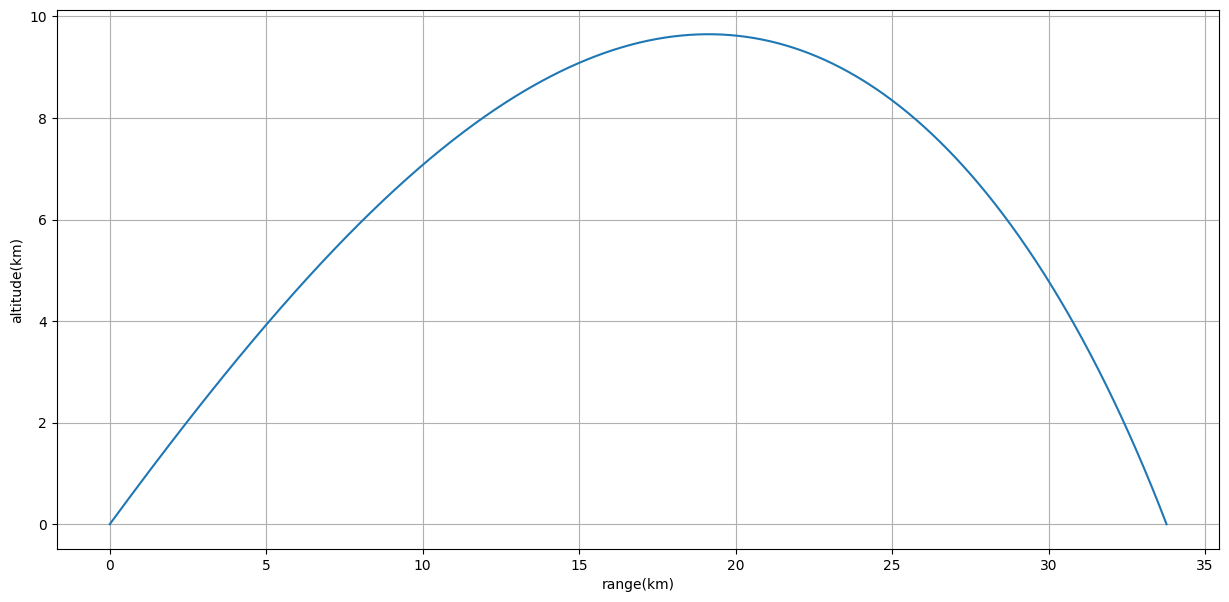

In [4]:
##################
# your code here #
def Runge_Kutta45(f, tf, y0, h) :
    t = np.arange(0, tf, h)

    y = np.zeros((len(y0), len(t)))
    y[:,0] = y0
    
    for i in range(len(t)-1) :
        k1 = f(y[:, i])
        k2 = f(y[:,i]+h/2*k1)
        k3 = f(y[:,i]+h/2*k2)
        k4 = f(y[:, i] + h*k3)
        y[:,i+1] = y[:,i] + h/6*(k1+2*k2+2*k3+k4)
        if y[5, i] > 0 and y[5, i+1] <= 0:
            # 직선 보간으로 고도=0이 되는 시점 계산
            frac = y[5, i] / (y[5, i] - y[5, i+1])
            y[:, i+1] = y[:, i] + frac * (y[:, i+1] - y[:, i])
            y[5, i+1] = 0.0  # 
            y = y[:, :i+2]
            t = t[:i+2]
            break


    return t, y

rk45t, rk45y = Runge_Kutta45(state_derivative,tf ,init ,dt)
print(rk45y[5,-1])

plt.figure(figsize=(15,7))
plt.plot(rk45y[4]/1000, rk45y[5]/1000)
plt.grid(True)
plt.xlabel("range(km)")
plt.ylabel("altitude(km)")
plt.show()
# your code here #
##################


<br>

_**(Problem 1c)**_
Plot the state variables over time using the provided model. Additionally, print out the rocket’s velocity, flight path angle, and flight range (distance traveled) at the moment when it impacts the ground.

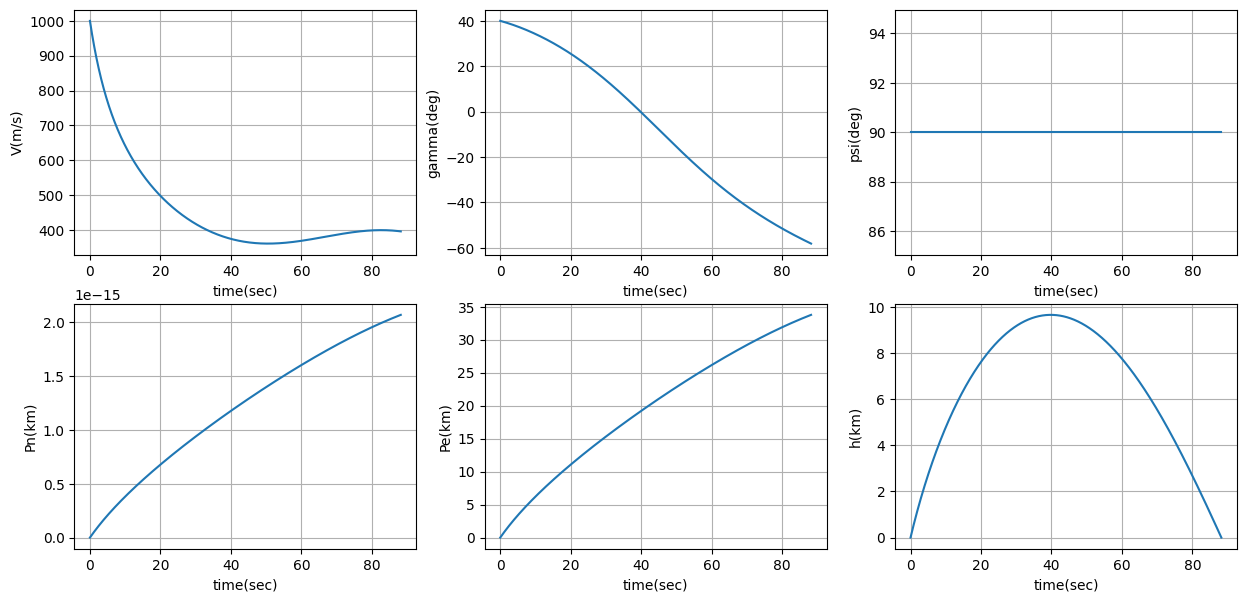

In [5]:
##################
# your code here #
plt.figure(figsize = (15,7))
plt.subplot(2,3,1)
plt.plot(rk45t, rk45y[0])
plt.grid(True)
plt.xlabel('time(sec)')
plt.ylabel("V(m/s)")

plt.subplot(232)
plt.plot(rk45t, rk45y[1]*Rad2Deg)
plt.grid(True)
plt.xlabel('time(sec)')
plt.ylabel("gamma(deg)")

plt.subplot(233)
plt.plot(rk45t, rk45y[2]*Rad2Deg)
plt.grid(True)
plt.xlabel('time(sec)')
plt.ylabel("psi(deg)")

plt.subplot(234)
plt.plot(rk45t, rk45y[3]/1000)
plt.grid(True)
plt.xlabel('time(sec)')
plt.ylabel("Pn(km)")

plt.subplot(235)
plt.plot(rk45t, rk45y[4]/1000)
plt.grid(True)
plt.xlabel('time(sec)')
plt.ylabel("Pe(km)")

plt.subplot(236)
plt.plot(rk45t, rk45y[5]/1000)
plt.grid(True)
plt.xlabel('time(sec)')
plt.ylabel("h(km)")

plt.show()
# your code here #
##################

<br>

---

<br>

_**(Problem 2)**_
Perform a Monte Carlo simulation to compute the trajectory of a rocket considering the effects of wind. The following assumptions are made:
    
- Wind is assumed to blow only horizontally, meaning there is no vertical component in the $h$- or $d$-direction. In the NED coordinate system, the wind velocity is expressed as $v_w = (v_{w,n}, v_{w,e}, 0)$.

    * At the initial time step $k = 0$, the wind velocity components $v_{w,n}$ and $v_{w,e}$ follow a normal distribution with a mean of $0$ and a standard deviation of $5$. The vertical wind velocity component $v_{w,d} = 0$ is set to $0$ for all simulations.
    * A random walk is applied to simulate wind speed changes at each time step $k$. The wind velocities are updated as follows, where $r_n$ and $r_e$ are random variables generated independently at each step, both following a normal distribution with a mean of $0$ and a standard deviation of $1$.

\begin{align*}
  v_{w,n}(t) &= v_{w,n}(t-\Delta t) + r_{n}(t) \\
  v_{w,e}(t) &= v_{w,e}(t-\Delta t) + r_{e}(t)
\end{align*}



<br>

_**(Problem 2a)**_
Using the same definition of state variables as in the previous problem, define the function `state_derivative` that computes the time derivatives of the state variables $\dot{z}_t$ considering the wind effects. The function should take the current state $z_t$ and wind velocity $v_w$ as inputs. You may reuse most of the `state_derivative` function defined in Problem 1, but clearly indicate the modified parts to account for the wind.

In [6]:
def state_derivative(z,v_w):
  V, gamma, psi, pn, pe, h = z

  ##################
  # your code here #
  # 상대풍을 고려하여 위의 제시된 조건대로 n,e,d 방향의 상대풍을 선언한다.
  v_wn, v_we, v_wd = v_w
  
  rho = 1.225*np.exp(-h/8500)
  drag_rotation_matrix = np.array([[np.cos(gamma)*np.cos(psi), np.cos(gamma)*np.sin(psi), -np.sin(gamma)],
                                   [-np.sin(psi), np.cos(psi), 0],
                                   [np.sin(gamma)*np.cos(psi), np.sin(gamma)*np.sin(psi), np.cos(gamma)]])
  
  pn_dot = V*np.cos(gamma)*np.cos(psi)
  pe_dot = V*np.cos(gamma)*np.sin(psi)
  h_dot = V*np.sin(gamma)
  #상대풍을 고려한 속도를 구한다.
  V_vector_rel = np.array([pn_dot-v_wn, pe_dot-v_we, -h_dot-v_wd])
  #항력의 경우 wind axis 즉, 상대풍이 고려된 축에 대해서 작용하므로 1번과 다르게 상대풍을 고려한 속도를 넣어준다.
  drag_ned_coordinate = -0.5*rho*np.linalg.norm(V_vector_rel)*S*Cd*V_vector_rel
  drag_xyz_coordinate = drag_rotation_matrix@drag_ned_coordinate
  V_dot = drag_xyz_coordinate[0]/m - g*np.sin(gamma)
  gamma_dot = (-drag_xyz_coordinate[2] - m*g*np.cos(gamma))/m/V
  psi_dot = drag_xyz_coordinate[1]/m/V
  # your code here #
  ##################

  return np.array([V_dot, gamma_dot, psi_dot, pn_dot, pe_dot, h_dot])

<br>

_**(Problem 2b)**_
Perform a Monte Carlo simulation with 2000 iterations, each accounting for random wind effects, to simulate the rocket’s trajectory. Overlap all 2000 trajectories on a single plot.

In [7]:
# integration parameters
tf = 200                  # final time
dt = 0.1                  # step size
t = np.arange(0, tf, dt)  # time (tentative)
N = len(t)                # number of time steps

# initial conditions
V = 1000.0                # velocity
gamma = 40*Deg2Rad        # flight path angle
psi = 90*Deg2Rad          # heading
pn, pe, h = np.zeros(3)   # position
init = [V, gamma, psi, pn, pe, h]

# Monte-Carlo simulation parameter
n_mc = 2000               # number of Monte-Carlo runs

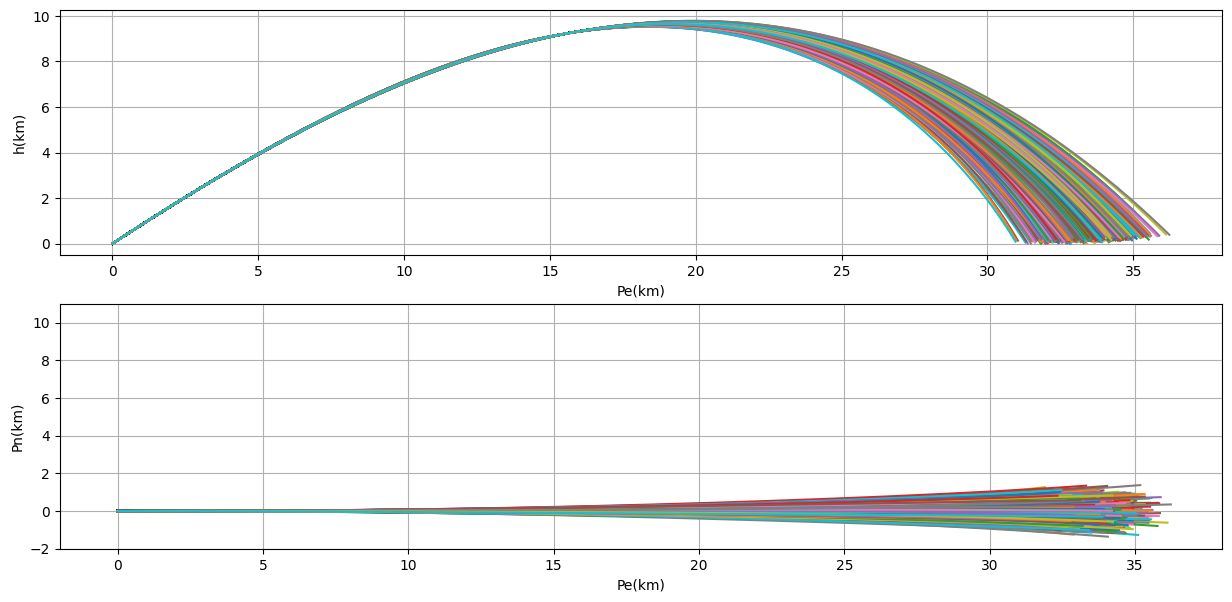

In [8]:

##################
# your code here #
plt.figure(figsize = (15,7))
final_position = np.zeros((2, n_mc))

for n in range(n_mc) :
	v_wn = np.zeros(N)
	v_we = np.zeros(N)
	v_wd = np.zeros(N)

	v_wn[0] = np.random.randn()*5
	v_we[0] = np.random.randn()*5
	for i in range(N-1) :
		v_wn[i+1] = v_wn[i] + np.random.randn()
		v_we[i+1] = v_we[i] + np.random.randn()

	z = np.zeros((6, len(t)))
	z[:,0] = init
	deriv_p = state_derivative(z[:,0], [v_wn[0], v_we[0], v_wd[0]])
	for i in range(len(t)-1) :
		deriv = state_derivative(z[:,i], [v_wn[i], v_we[i], v_wd[i]])
		z[:,i+1] = z[:,i] + 0.5*dt*(3*deriv - deriv_p)
		deriv_p = deriv
		if z[5, i] > 0 and z[5, i+1] <= 0:
            # 직선 보간으로 고도=0이 되는 시점 계산
			frac = z[5, i] / (z[5, i] - z[5, i+1])
			z[:, i+1] = z[:, i] + frac * (z[:, i+1] - z[:, i])
			z[5, i+1] = 0.0  # 
			z = z[:, :i+2]
			t = t[:i+2]
			break

	final_position[:, n] = z[3:5, -1]

	plt.subplot(211)
	plt.plot(z[4,:]/1000, z[5,:]/1000)
	plt.xlabel("Pe(km)")
	plt.ylabel("h(km)")
	plt.grid(True)

	plt.subplot(212)
	plt.plot(z[4,:]/1000, z[3,:]/1000)
	plt.xlabel("Pe(km)")
	plt.ylabel("Pn(km)")
	plt.grid(True)
	plt.xlim((-2, 38))
	plt.ylim((-2, 11))


plt.show()


# your code here #
##################

<br>

_**(Problem 2c)**_
Using the results of the 2000 Monte Carlo simulations, plot the impact points on the North-East (NE) plane using the `scatter` function from the `matplotlib.pyplot` module. Additionally, plot the mean impact point on the same plane.

The accuracy of a rocket’s impact is typically expressed using the Circular Error Probable (CEP). The CEP is defined as the radius of a circle, centered at the mean impact point, within which 50% of the impacts will occur. For example, if a rocket has a CEP of 200 meters, approximately 50 out of 100 launches will land within a 200-meter radius from the mean impact point.

Based on the Monte-Carlo simulation results, estimate the CEP for this rocket.

0.7133355704777646


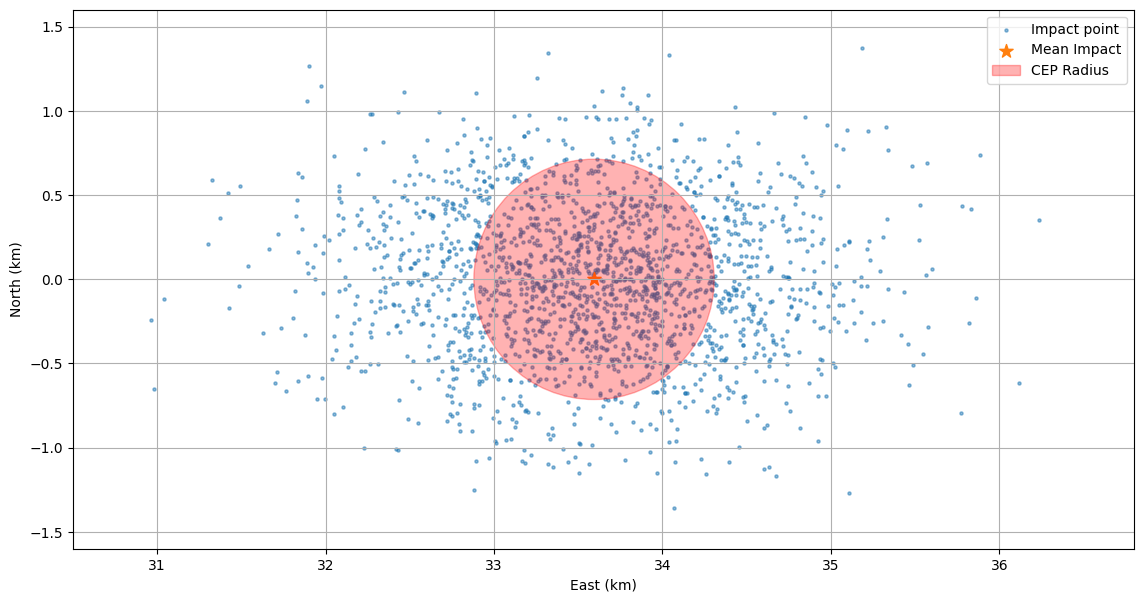

In [9]:
##################
# your code here #
pe_mean = np.mean(final_position[1,:])
pn_mean = np.mean(final_position[0,:])

distance = np.sqrt(np.abs((pe_mean-final_position[1,:])**2 + (pn_mean-final_position[0,:])**2))/1000

distance_half_percentile = np.percentile(distance, 50)

print(distance_half_percentile)

fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(final_position[1,:]/1000, final_position[0,:]/1000,s =5 ,alpha = 0.5, label = 'Impact point')
ax.scatter(pe_mean/1000, pn_mean/1000,s =100 ,marker = '*', label ='Mean Impact')
circle = plt.Circle((pe_mean/1000, pn_mean/1000), distance_half_percentile, color='red', label='CEP Radius', alpha = 0.3)
ax.add_patch(circle)

ax.set_xlim((30.5, 36.8))
ax.set_ylim((-1.6, 1.6))
ax.set_xlabel('East (km)')
ax.set_ylabel('North (km)')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
plt.show()
# your code here #
##################

## Additional problem

- 본 문제에서는 기상청에서 제공하는 지상관측 통계자료를 이용하여 상대풍을 계산하였다. 지상관측 자료의 특성상 수직 성분(D축)에 대한 풍속은 제공되지 않으므로, 본 시뮬레이션에서는 해당 성분을 0으로 두었다. 또한, 시뮬레이션은 0.1초 간격으로 총 200초(=2000 step)를 필요로 하지만, 기상청 자료는 1시간 단위로 제공되어 실시간 입력에 활용하기에는 해상도가 부족하다. 따라서 2025년 8월 23일부터 9월 23일까지 한 달간의 관측 자료를 기반으로 풍속과 풍향의 평균값과 분산을 산출하였으며, 이를 통해 통계적 추정을 수행하여 Monte Carlo 시뮬레이션을 진행하였다.

## 풍속/풍향 → NED 방향 분해

풍속 $V_{w}$와 풍향 $\theta$가 주어졌을 때, 이를 NED 좌표계의 북(N), 동(E) 성분으로 분해하면 다음과 같다:

$$
v_{w,n} = V_{w} \cdot \cos(\theta)
$$

$$
v_{w,e} = V_{w} \cdot \sin(\theta)
$$

* $v_{w,n}$: 북향 성분 (North)
* $v_{w,e}$: 동향 성분 (East)
* $\theta$: 풍향 각도 (북쪽을 기준으로 시계방향, 예: 90° = 동풍, 180° = 남풍)



In [10]:
import pandas as pd

wind_data = pd.read_csv("Incheon_wind_data.csv", encoding="cp949")

mean_velocity = wind_data["풍속(m/s)"].mean()
std_velocity = wind_data["풍속(m/s)"].std()
mean_dir = wind_data["풍향(16방위)"].mean()
std_dir = wind_data["풍향(16방위)"].std()

random_dir = np.random.normal(mean_dir, std_dir, N)
v_wn = np.random.normal(mean_velocity, std_velocity, N)*np.cos(random_dir)
v_we = np.random.normal(mean_velocity, std_velocity, N)*np.sin(random_dir)
v_wd = np.zeros(N)

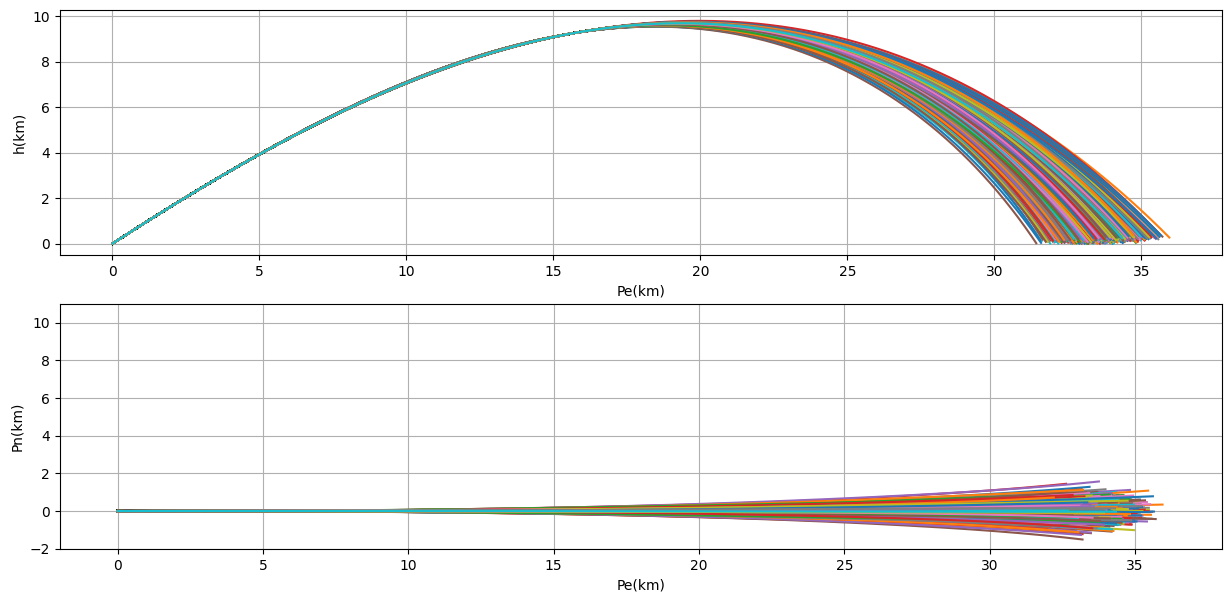

In [11]:
# integration parameters
tf = 200                  # final time
dt = 0.1                  # step size
t = np.arange(0, tf, dt)  # time (tentative)
N = len(t)                # number of time steps

# initial conditions
V = 1000.0                # velocity
gamma = 40*Deg2Rad        # flight path angle
psi = 90*Deg2Rad          # heading
pn, pe, h = np.zeros(3)   # position
init = [V, gamma, psi, pn, pe, h]

# Monte-Carlo simulation parameter
n_mc = 2000               # number of Monte-Carlo runs

plt.figure(figsize = (15,7))
final_position_new = np.zeros((2, n_mc))

for n in range(n_mc) :
	for i in range(N-1) :
		v_wn[i+1] = v_wn[i] + np.random.randn()
		v_we[i+1] = v_we[i] + np.random.randn()

	z = np.zeros((6, len(t)))
	z[:,0] = init
	deriv_p = state_derivative(z[:,0], [v_wn[0], v_we[0], v_wd[0]])
	for i in range(len(t)-1) :
		deriv = state_derivative(z[:,i], [v_wn[i], v_we[i], v_wd[i]])
		z[:,i+1] = z[:,i] + 0.5*dt*(3*deriv - deriv_p)
		deriv_p = deriv
		if z[5, i] > 0 and z[5, i+1] <= 0:
            # 직선 보간으로 고도=0이 되는 시점 계산
			frac = z[5, i] / (z[5, i] - z[5, i+1])
			z[:, i+1] = z[:, i] + frac * (z[:, i+1] - z[:, i])
			z[5, i+1] = 0.0  # 
			z = z[:, :i+2]
			t = t[:i+2]
			break

	final_position_new[:, n] = z[3:5, -1]

	plt.subplot(211)
	plt.plot(z[4,:]/1000, z[5,:]/1000)
	plt.xlabel("Pe(km)")
	plt.ylabel("h(km)")
	plt.grid(True)

	plt.subplot(212)
	plt.plot(z[4,:]/1000, z[3,:]/1000)
	plt.xlabel("Pe(km)")
	plt.ylabel("Pn(km)")
	plt.grid(True)
	plt.xlim((-2, 38))
	plt.ylim((-2, 11))


plt.show()

0.6285602585804995


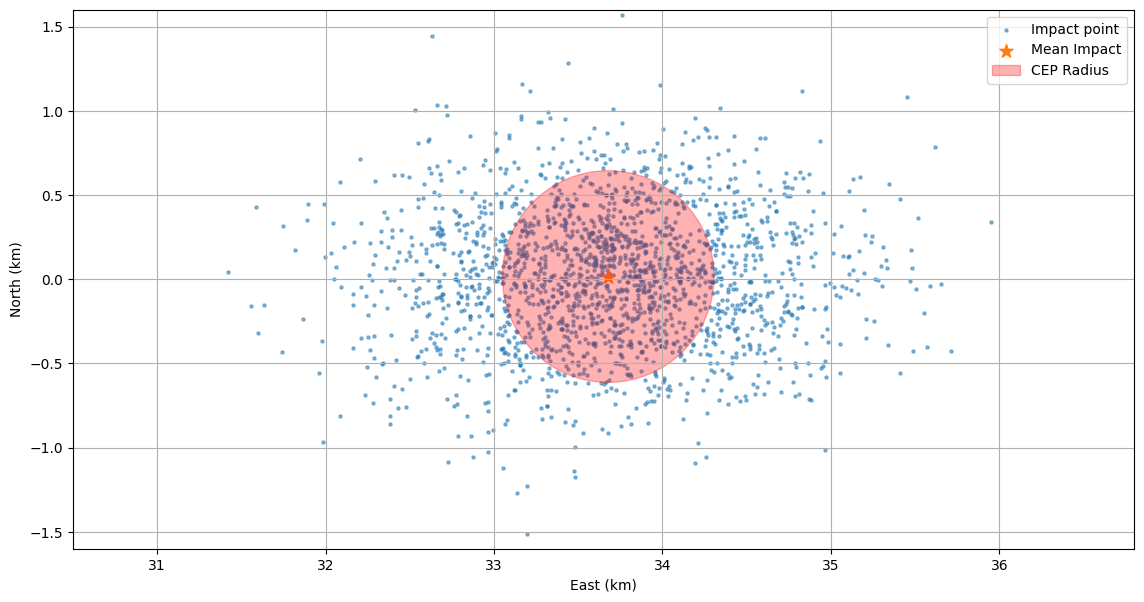

In [12]:
pe_mean_new = np.mean(final_position_new[1,:])
pn_mean_new = np.mean(final_position_new[0,:])

distance = np.sqrt(np.abs((pe_mean_new-final_position_new[1,:])**2 + (pn_mean_new-final_position_new[0,:])**2))/1000

distance_half_percentile_new = np.percentile(distance, 50)

print(distance_half_percentile_new)

fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(final_position_new[1,:]/1000, final_position_new[0,:]/1000,s =5 ,alpha = 0.5, label = 'Impact point')
ax.scatter(pe_mean_new/1000, pn_mean_new/1000,s =100 ,marker = '*', label ='Mean Impact')
circle = plt.Circle((pe_mean_new/1000, pn_mean_new/1000), distance_half_percentile_new, color='red', label='CEP Radius', alpha = 0.3)
ax.add_patch(circle)

ax.set_xlim((30.5, 36.8))
ax.set_ylim((-1.6, 1.6))
ax.set_xlabel('East (km)')
ax.set_ylabel('North (km)')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
plt.show()

기상청 자료를 통계적 추정을 통해서 시뮬레이션한 결과와 가우시안 분포를 통해서 random walk 방식을 통해서 시뮬레이션한 결과의 $P_{e}$, $P_{n}$값의 평균, CEP 값은 다음과 같다.

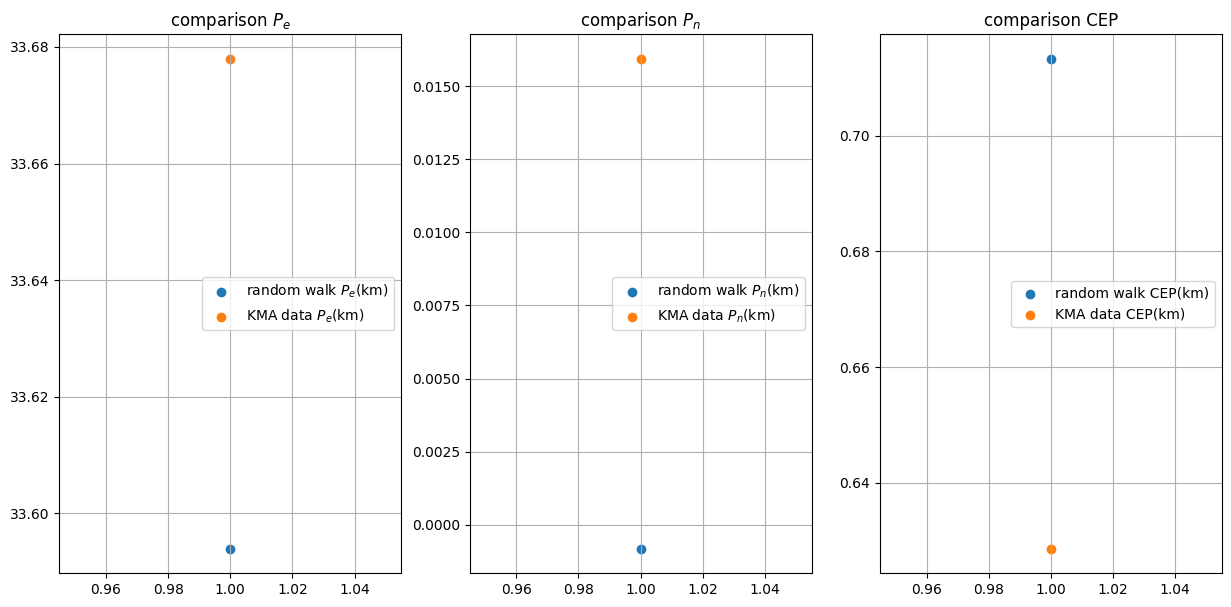

In [13]:
plt.figure(figsize = (15,7))
plt.subplot(131)
plt.scatter(1, pe_mean/1000, label = 'random walk $P_{e}$(km)')
plt.scatter(1, pe_mean_new/1000, label = 'KMA data $P_{e}$(km)')
plt.title('comparison $P_{e}$')
plt.grid()
plt.legend()

plt.subplot(132)
plt.scatter(1, pn_mean/1000, label = 'random walk $P_{n}$(km)')
plt.scatter(1, pn_mean_new/1000, label = 'KMA data $P_{n}$(km)')
plt.title('comparison $P_{n}$')
plt.grid()
plt.legend()

plt.subplot(133)
plt.scatter(1, distance_half_percentile, label = 'random walk CEP(km)')
plt.scatter(1, distance_half_percentile_new, label = 'KMA data CEP(km)')
plt.title('comparison CEP')
plt.grid()
plt.legend()

plt.show()

결론 : 랜덤 가정보다 실제 기상 자료 기반 모델이 로켓 낙하지점 예측을 더 안정적이고 현실적으로 표현한다.